## Процесс решения задачи

Решение почти любой DS задачи в продуктовой аналитике можно разбить на следующие этапы:
1) Проанализировать задачу, понять к какому виду и классу обучения она относится. Вместе с бизнесом выбрать метрику

2) EDA (exploratory data analysis) - процесс когда мы изучаем качество данных, признаки, их распределение и связь с целевой(целевыми переменными)

3) Предобработка данных (обработка пропусков, кодирование/создание новых признаков, очистка данных от выбросов и т.д.)

4) Обучение и оптимизация моделей

5) Валидация результатов

## Данные и задача

Рассмотрим все этапы выше на примере задачи предсказания LTV (Lifetime Value) покупателя.

Ссылка на данные: https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/



In [1]:
!pip freeze requiements.txt

absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.8.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.6.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.18.1
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.8
cuda-python==12.2.1
cudf-cu12 @ https://pypi.nvidia.c

## 1) Исследовательский анализ данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('./data/LTV.csv')

train_data.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
7193,QA66968,California,6756.062791,No,Extended,Bachelor,1/31/11,Employed,F,46879,...,62,2,3,Personal Auto,Personal L3,Offer1,Agent,324.944098,Four-Door Car,Medsize
771,PA16884,California,4118.588554,Yes,Premium,Bachelor,1/28/11,Employed,F,69379,...,79,0,1,Personal Auto,Personal L3,Offer1,Branch,494.400000,Two-Door Car,Medsize
8461,ER52041,California,3237.305187,No,Extended,College,1/7/11,Unemployed,M,0,...,91,0,1,Personal Auto,Personal L3,Offer1,Call Center,659.435886,Four-Door Car,Medsize
7950,LW29130,Washington,5272.932008,No,Basic,High School or Below,2/22/11,Employed,F,24423,...,62,0,6,Corporate Auto,Corporate L3,Offer1,Branch,321.600000,Two-Door Car,Medsize
874,AL46984,California,8730.421977,No,Basic,High School or Below,2/4/11,Employed,M,43259,...,18,0,2,Personal Auto,Personal L2,Offer1,Branch,350.400000,Four-Door Car,Medsize
1886,EZ74530,Nevada,3074.105486,No,Basic,High School or Below,1/8/11,Unemployed,M,0,...,33,3,1,Personal Auto,Personal L2,Offer1,Web,748.800000,Sports Car,Medsize
2619,XK84089,California,2619.337376,Yes,Basic,Bachelor,2/5/11,Employed,M,78618,...,56,0,1,Personal Auto,Personal L3,Offer1,Agent,225.578841,Two-Door Car,Medsize
8210,AE93522,Washington,7212.143863,No,Basic,Bachelor,1/23/11,Employed,M,75891,...,5,0,2,Corporate Auto,Corporate L2,Offer2,Branch,61.285525,Two-Door Car,Medsize
3936,PT70350,Oregon,28511.033310,No,Premium,High School or Below,2/21/11,Employed,M,27607,...,56,0,2,Corporate Auto,Corporate L1,Offer4,Agent,640.584145,Four-Door Car,Medsize
8115,DB79306,California,4416.345862,No,Basic,College,1/4/11,Employed,M,25480,...,49,3,1,Personal Auto,Personal L1,Offer4,Web,486.545439,SUV,Small


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

In [5]:
X_src = train_data.drop(['Customer', 'Customer Lifetime Value'], axis = 1)
y_src = train_data['Customer Lifetime Value']

### Разделение численных и категориальных признаков

In [6]:
num_cols = []
str_cols = []

cols_and_type = X_src.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else:
        str_cols.append(col)

print(num_cols)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [7]:
cols_and_type

{'State': dtype('O'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

In [8]:
train_data[num_cols].describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## 2) Визуализация результатов разведочного анализа и выводы

### Распределение целевой переменной LTV

In [9]:
from scipy import stats
from scipy.stats import norm, skew

((array([-3.78815982, -3.56175146, -3.43739314, ...,  3.43739314,
          3.56175146,  3.78815982]),
  array([ 1898.007675,  1898.683686,  1904.000852, ..., 73225.95652 ,
         74228.51604 , 83325.38119 ])),
 (5763.134571523224, 8004.94047498708, 0.8384863636431867))

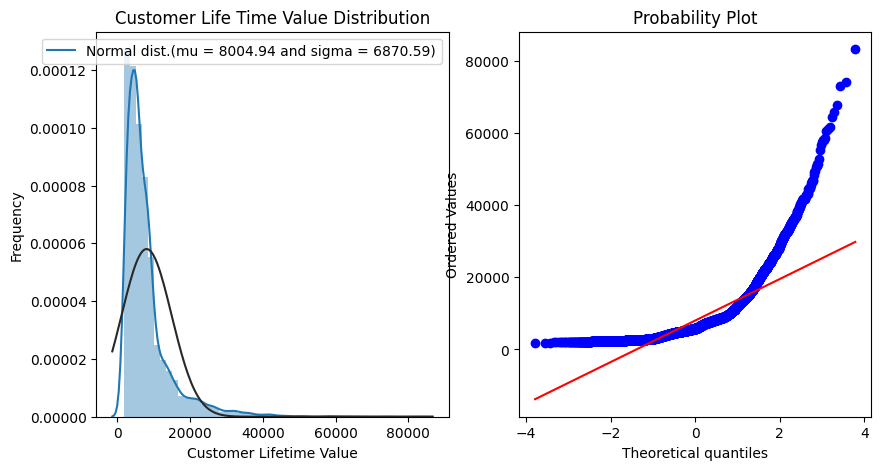

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(train_data['Customer Lifetime Value'], fit=norm, ax=axes[0])

(mu, sigma) = norm.fit(train_data['Customer Lifetime Value'])

axes[0].legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu, sigma)], loc = 'best')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Customer Life Time Value Distribution')

## Q-Q PLOT
stats.probplot(train_data['Customer Lifetime Value'], plot=axes[1])

Целевая переменная не сбалансированна, распределена не нормально.
Значительная превалирующая часть покупателей с доходом до 100 000, покупатели с большим доходом представлены в значительно меньшем количестве.

#### Нормализация целевой переменной LTV

Нормализуем LTV с применением логарифмической функции:

In [11]:
train_data1 = train_data.copy(deep = True)

In [12]:
train_data1['Customer Lifetime Value'] = np.log1p(train_data['Customer Lifetime Value'])

((array([-3.78815982, -3.56175146, -3.43739314, ...,  3.43739314,
          3.56175146,  3.78815982]),
  array([ 7.54908675,  7.54944267,  7.55223773, ..., 11.20131889,
         11.21491714, 11.33052048])),
 (0.6426046936490144, 8.748753196029401, 0.9840300084775555))

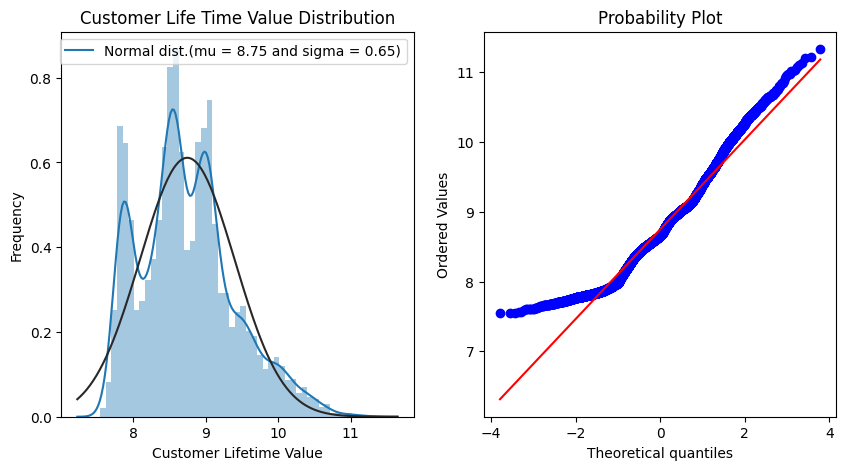

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(train_data1['Customer Lifetime Value'], fit=norm, ax=axes[0])

(mu, sigma) = norm.fit(train_data1['Customer Lifetime Value'])

axes[0].legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu, sigma)], loc = 'best')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Customer Life Time Value Distribution')

## Q-Q PLOT
stats.probplot(train_data1['Customer Lifetime Value'], plot=axes[1])

In [14]:
print('Искривление вероятностной кривой до преобразования:', train_data['Customer Lifetime Value'].skew())
print('Искривление вероятностной кривой после преобразования:', train_data1['Customer Lifetime Value'].skew())

Искривление вероятностной кривой до преобразования: 3.0322802599299847
Искривление вероятностной кривой после преобразования: 0.5761717967456789


#### Переопределение данных для нормализованной целевой переменной

In [15]:
y1_src = train_data1['Customer Lifetime Value']

### Распределение численных признаков

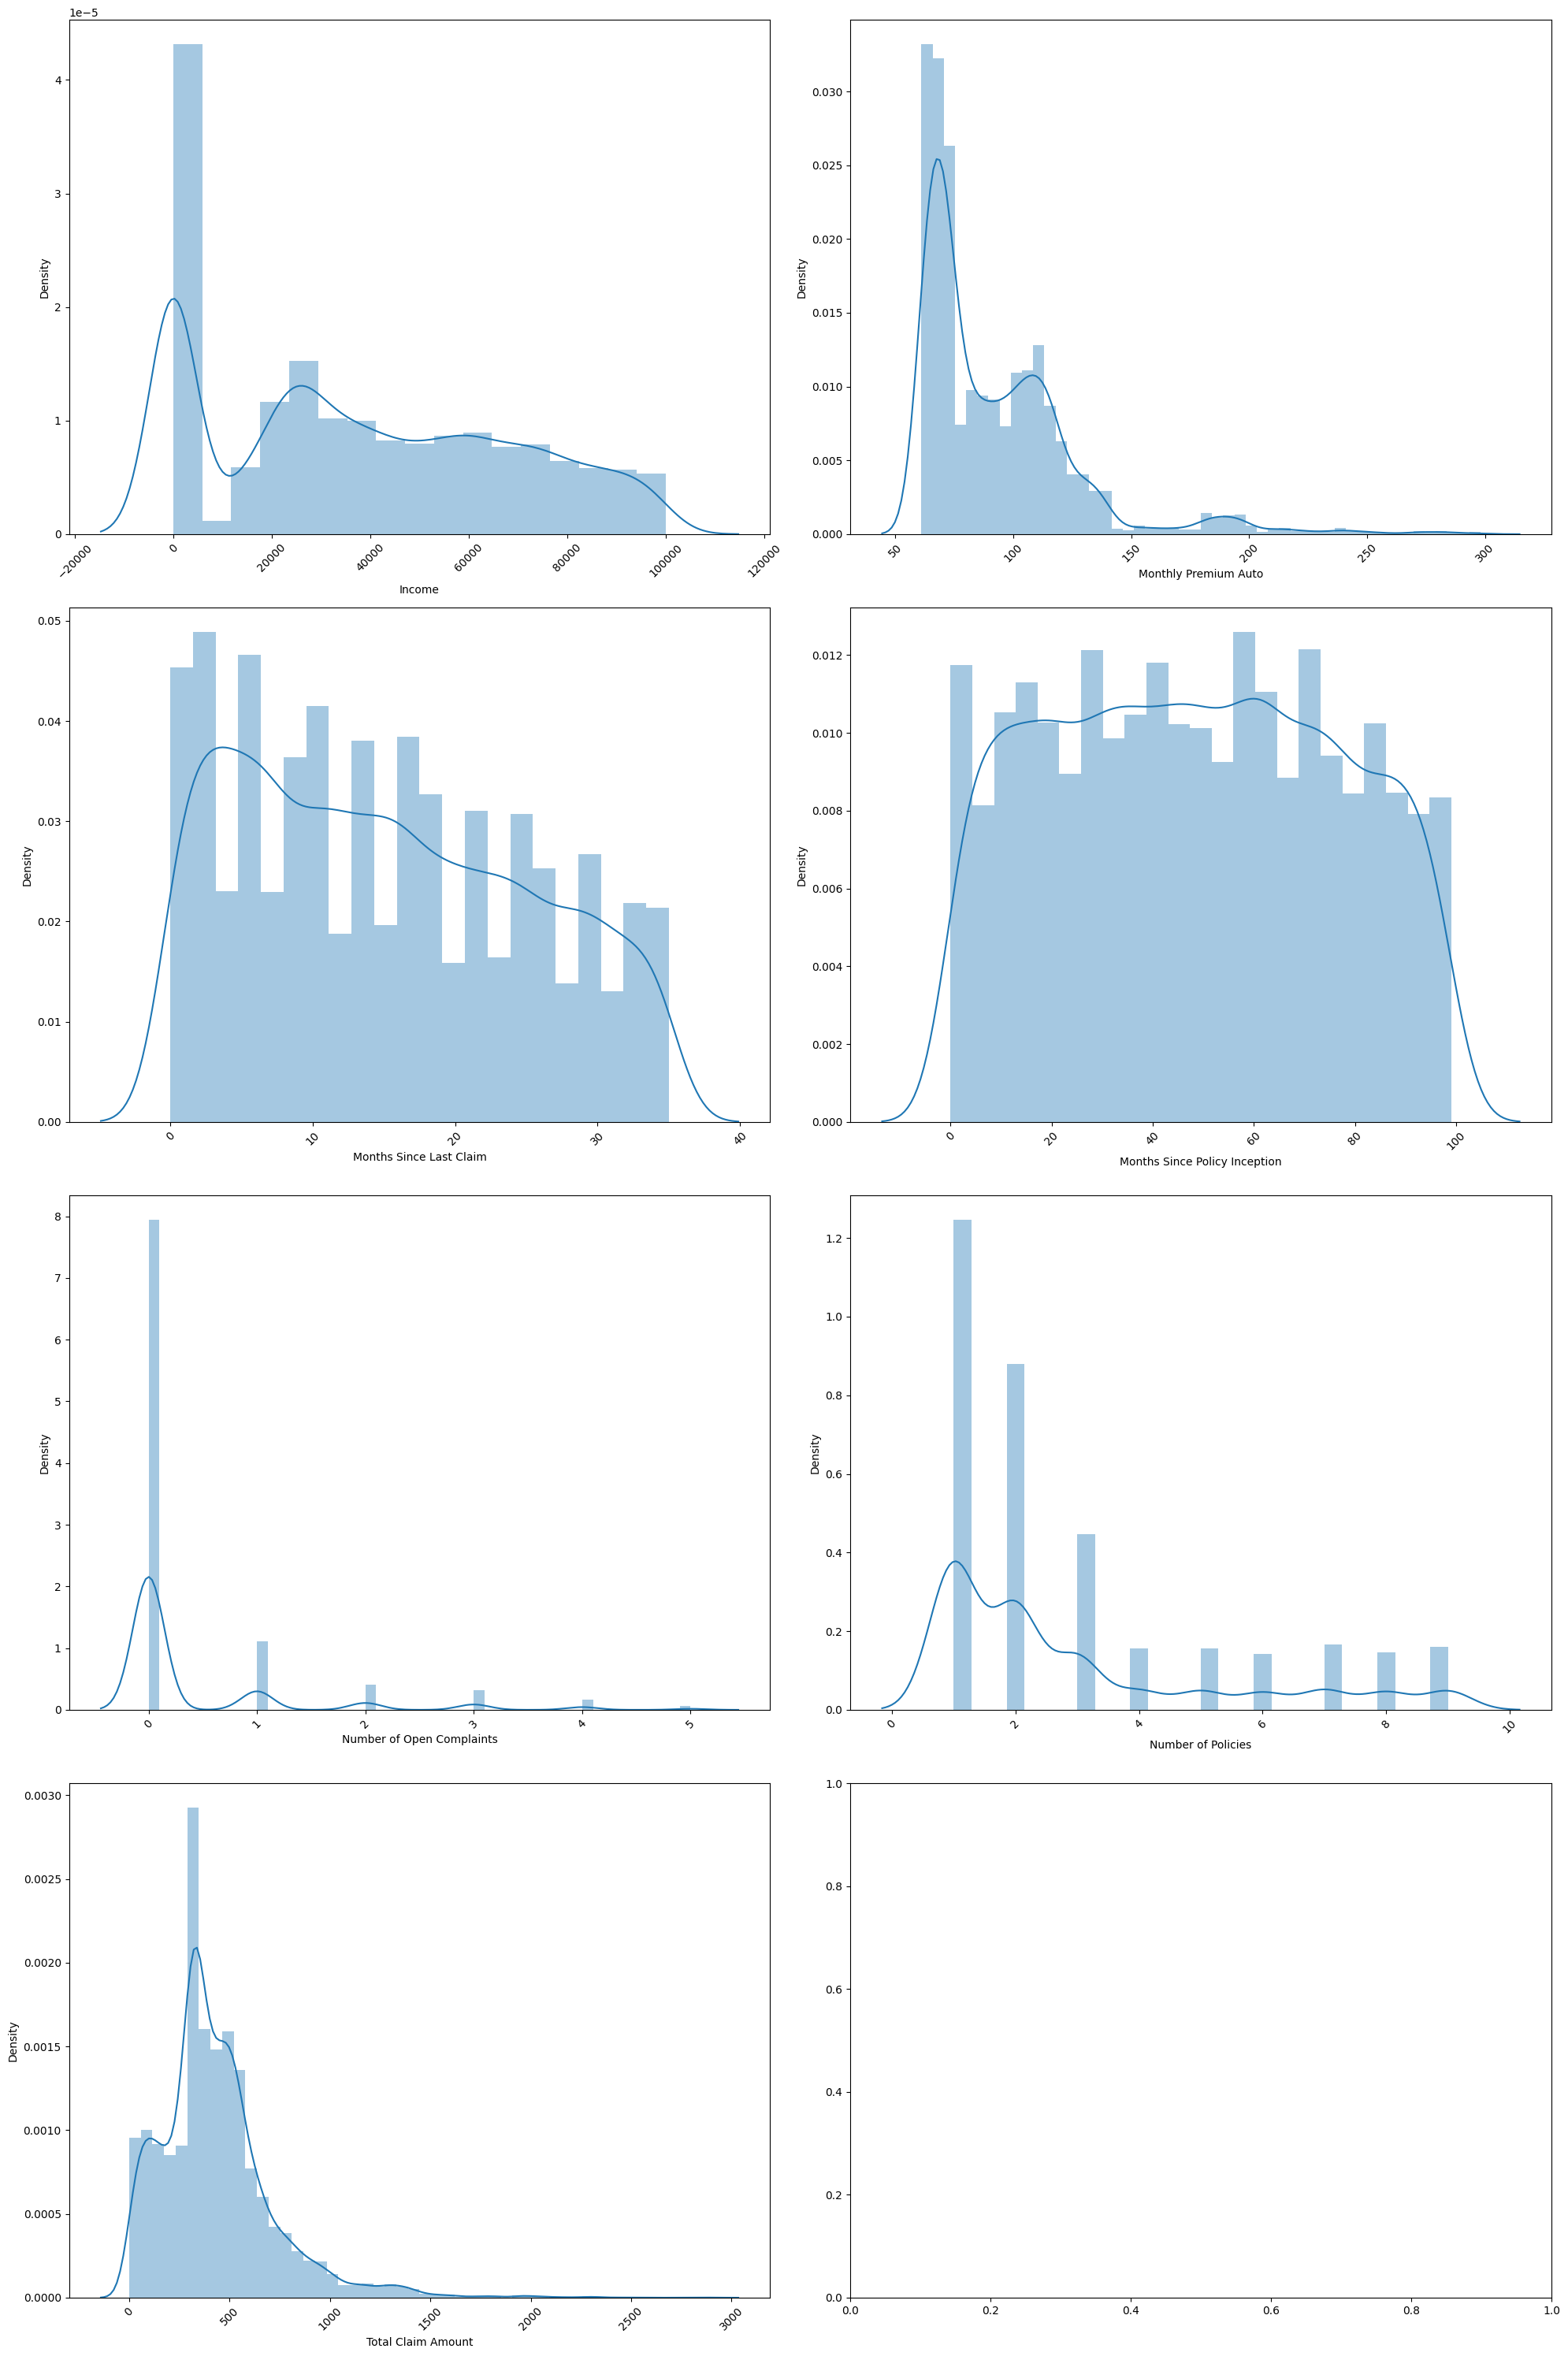

In [16]:
fig, axes = plt.subplots(round(len(num_cols) / 2), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        sns.distplot(train_data1[num_cols[i]], ax = ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()

Все численные признаки не имеют нормального распределения.

### Распределение категориальных признаков

#### Количество покупателей в каждой категории

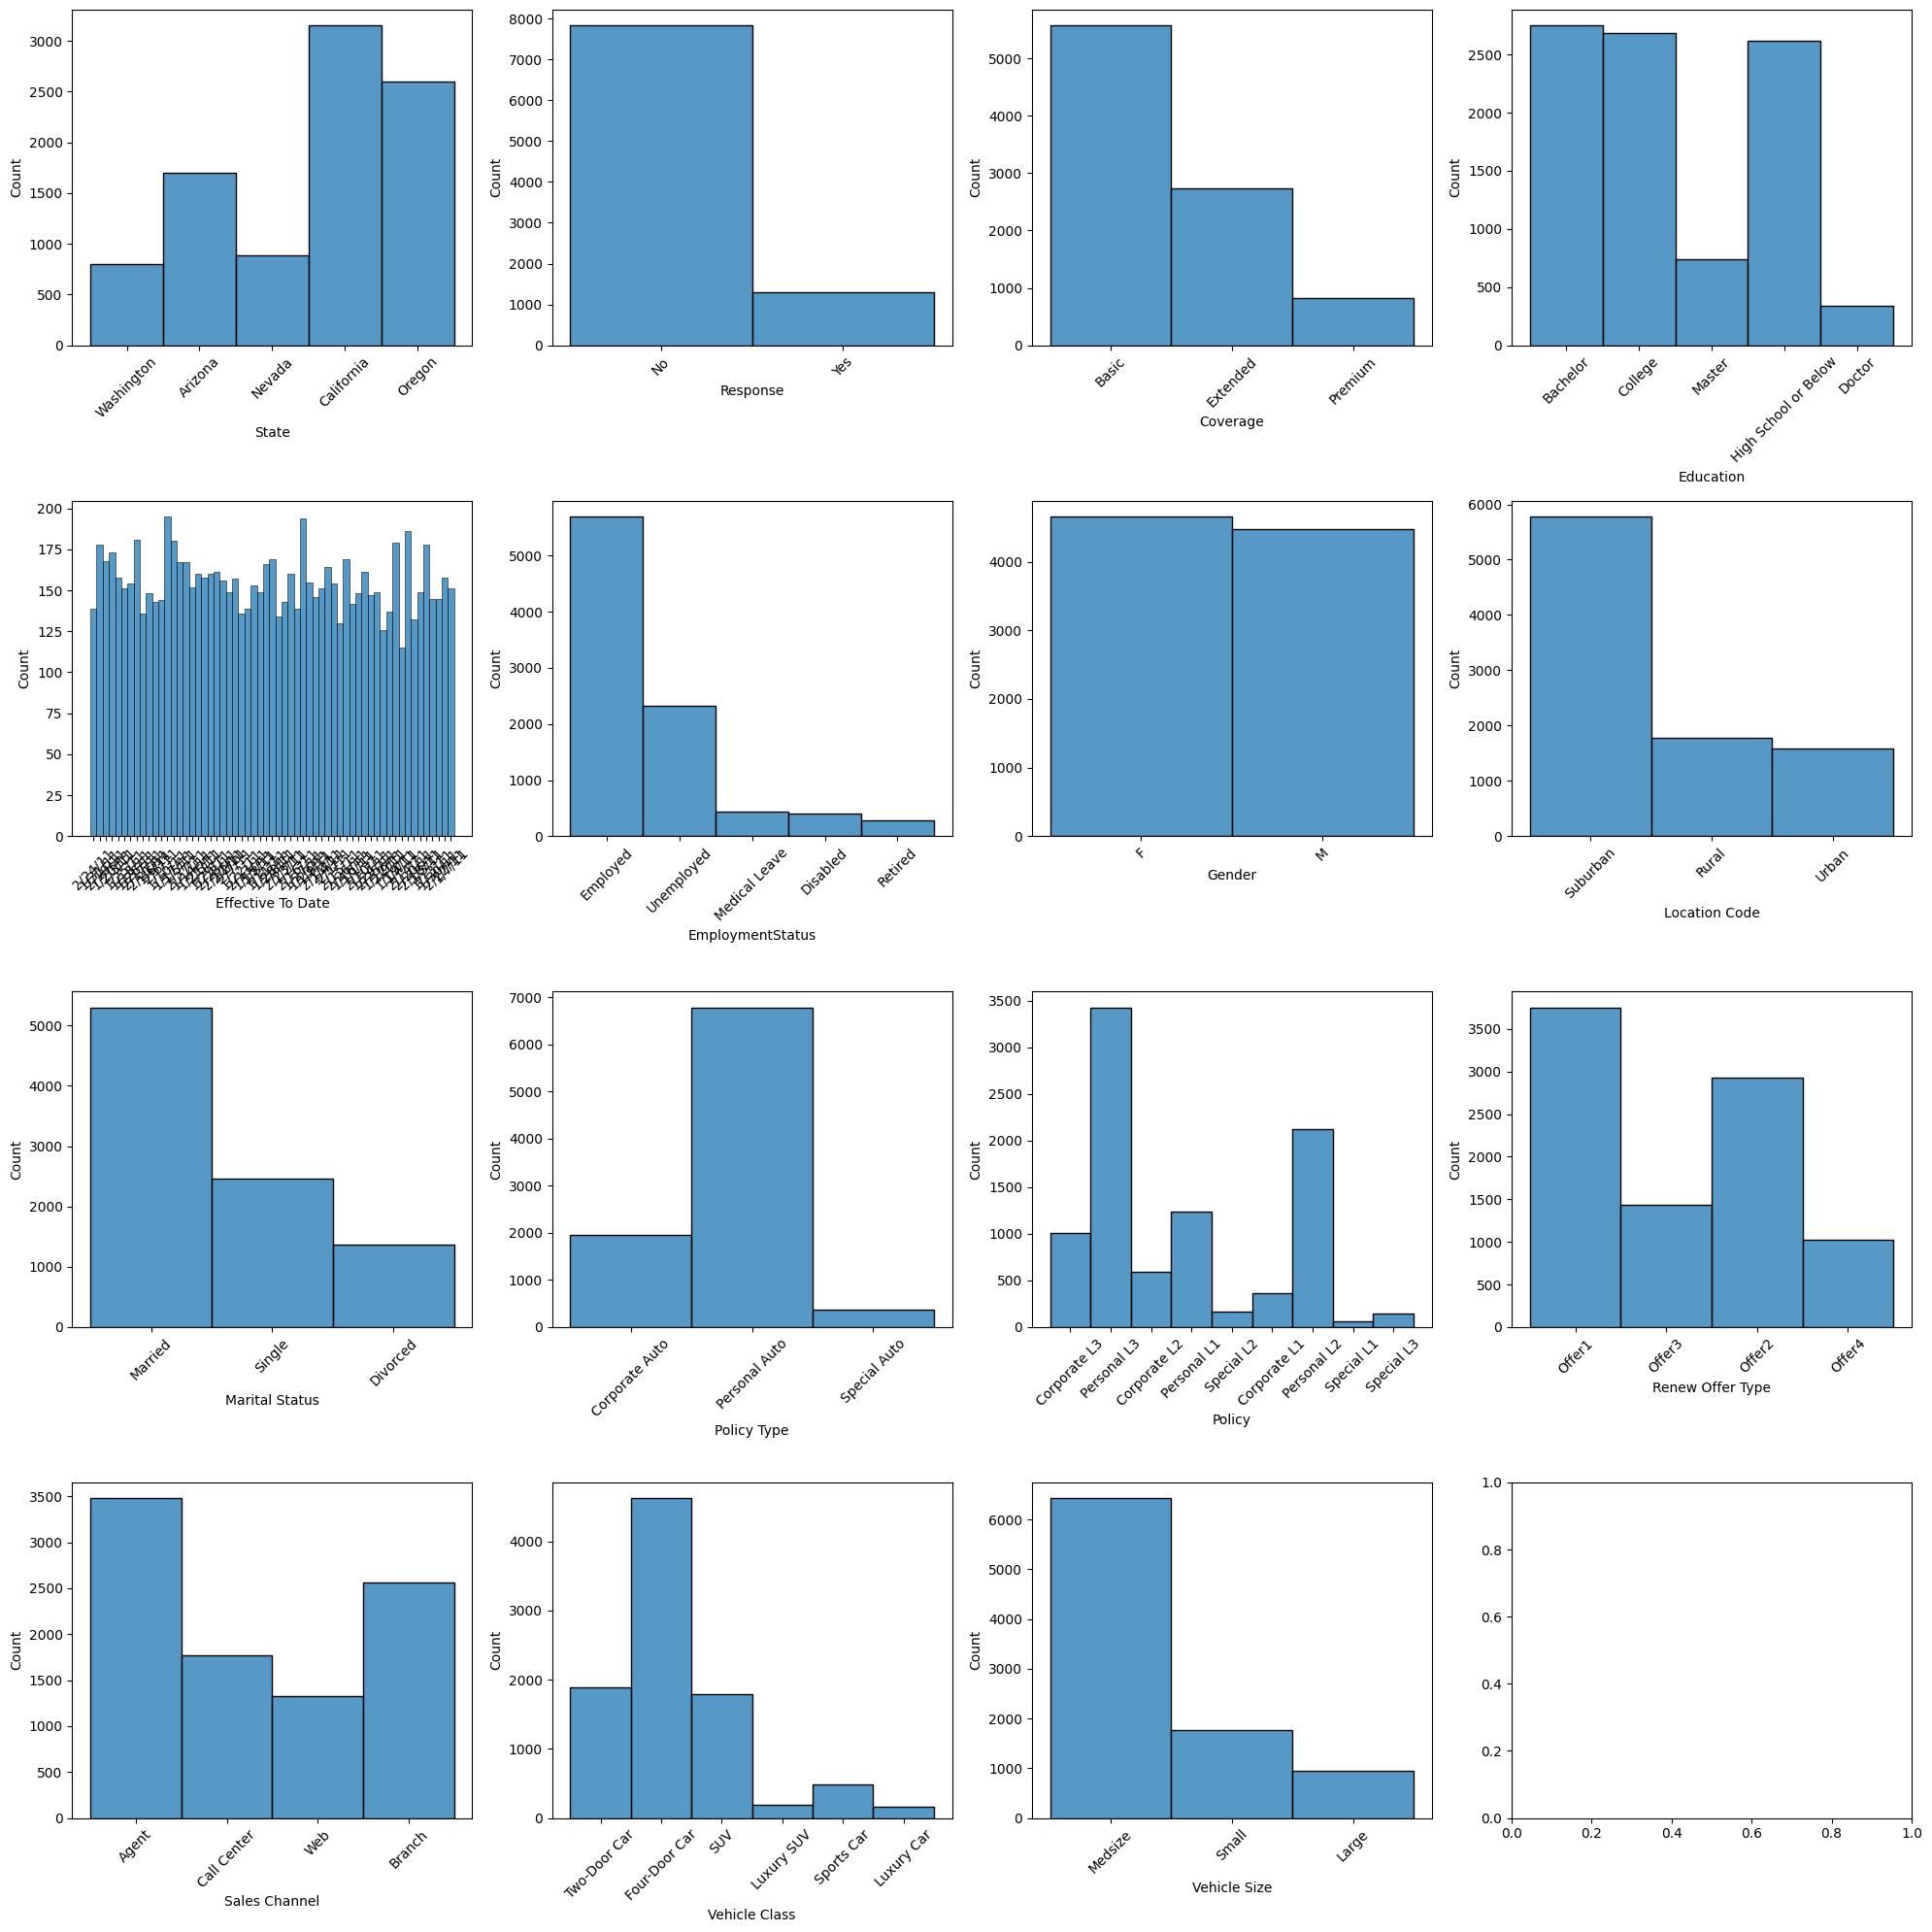

In [17]:
fig, axes = plt.subplots(round(len(str_cols) / 4), 4, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(str_cols):
        sns.histplot(x = train_data[str_cols[i]], data = train_data, ax = ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()

#### Среднее значение целевой переменной LTV в каждой категории

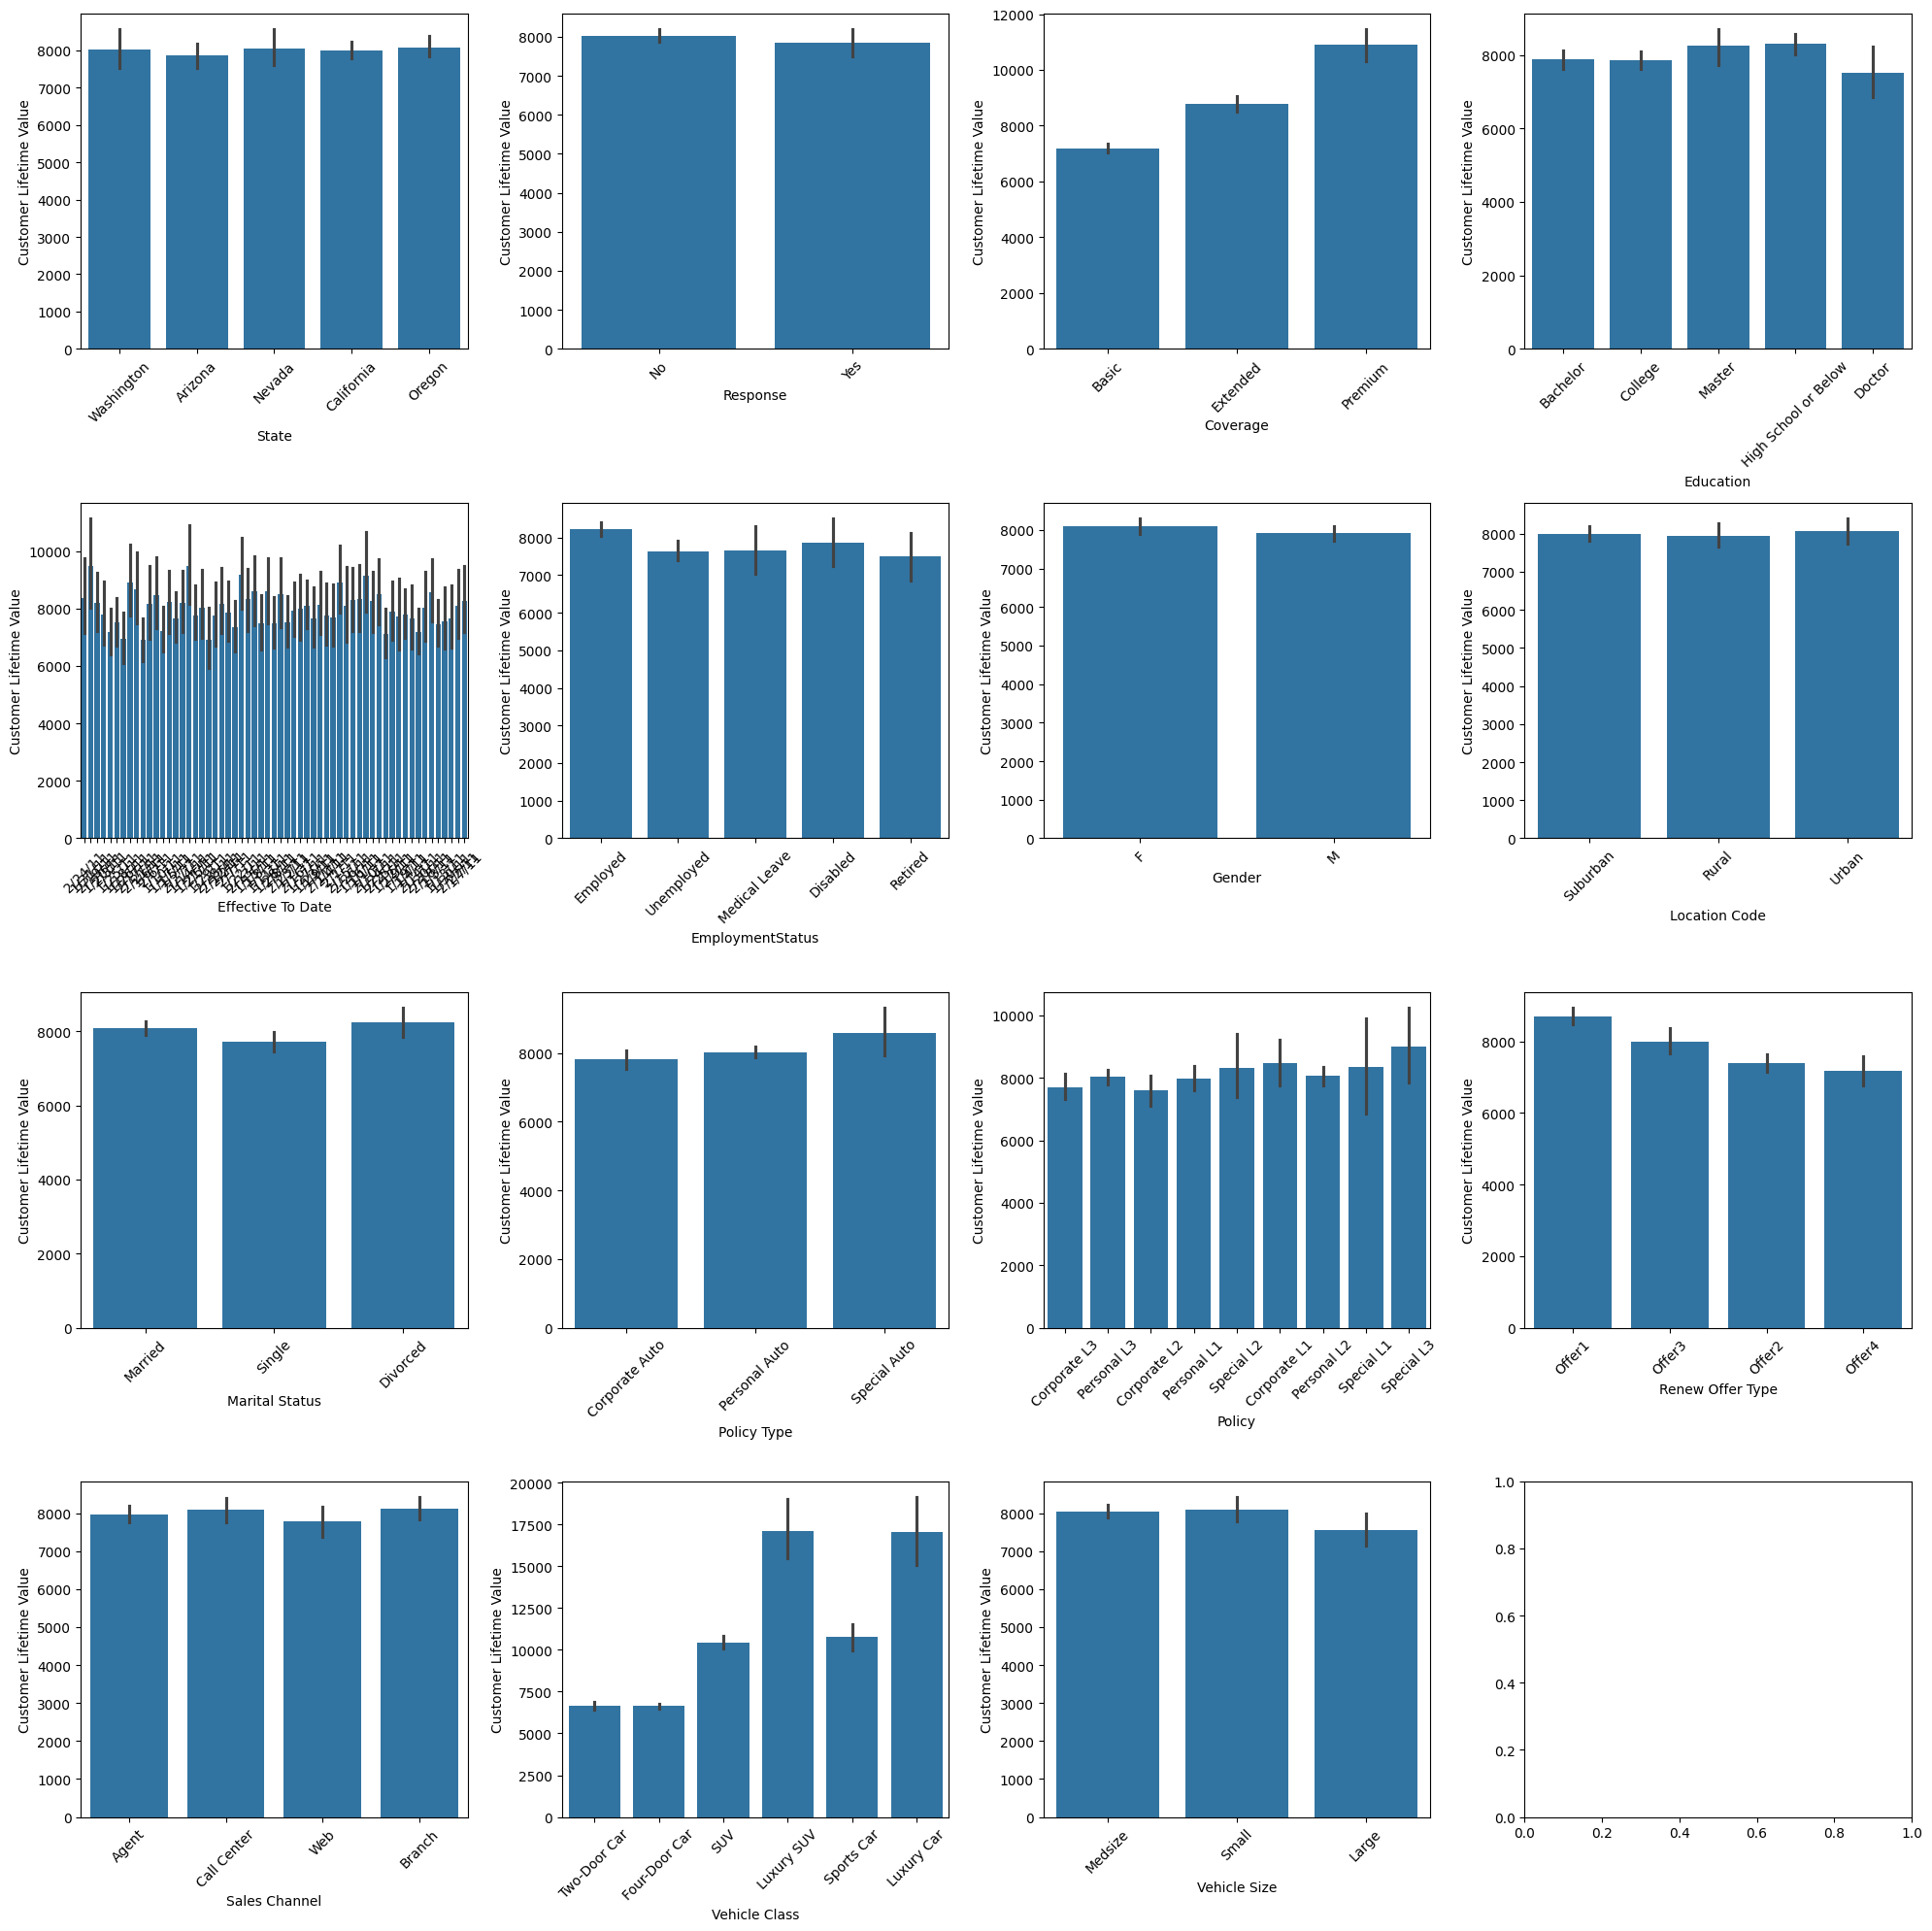

In [18]:
fig, axes = plt.subplots(round(len(str_cols) / 4), 4, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(str_cols):
        sns.barplot(x = train_data[str_cols[i]], y = train_data['Customer Lifetime Value'], data = train_data, ax = ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()

В отдельных категориях, таких как:
- _State_
- _Response_
- _Gender_
- _Location Code_
- _Sales Channel_  

средние значения LTV по их категориям мало отличаются.  

Поэтому можно считать __влияние__ этих признаков __незначительным__.

## 3) Предобработка признаков

**Важно** Любое изменение признаков нужно делать и на тренировочной и на тестовой выборке

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Разделение данных на обучающую и проверочную (тестовую) выборки

In [20]:
print(X_src.shape)
print(y1_src.shape)

(9134, 22)
(9134,)


In [21]:
y_src_int = y_src.astype(int)
y1_src_int = y1_src.astype(int)

In [22]:
X, X_test, y, y_test, y1, y1_test = train_test_split(X_src, y_src, y1_src, random_state = 42, test_size = .2)

In [23]:
X_int, X_int_test, y_int, y_int_test, y1_int, y1_int_test = train_test_split(X_src, y_src_int, y1_src_int, random_state = 42, test_size = .2)

### Label-энкодинг

In [24]:
le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])
    X_test[col] = le.transform(X_test[col])


X.sample(10)

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6031,3,0,1,0,0,1,0,83252,1,1,...,98,0,1,1,3,1,2,384.000000,0,1
771,1,1,2,0,20,1,0,69379,1,2,...,79,0,1,1,5,0,1,494.400000,5,1
1577,3,1,1,2,23,1,1,57709,1,1,...,26,0,1,1,3,1,1,600.000000,3,1
3258,0,0,0,1,4,1,0,51737,1,2,...,55,0,6,1,3,0,3,430.163277,0,1
8467,3,0,0,0,45,4,0,0,1,0,...,2,0,1,1,3,0,3,297.600000,0,1
4614,1,0,0,3,19,2,0,26660,1,1,...,40,0,8,1,4,2,0,453.600000,5,1
7775,1,0,0,0,39,4,0,0,1,1,...,39,0,2,0,0,2,0,439.200000,0,1
7045,1,0,0,0,3,1,0,52513,0,1,...,76,3,2,1,5,2,3,91.244938,5,1
6049,3,0,1,1,39,1,0,22946,1,1,...,72,0,8,1,5,1,0,377.350433,0,0
9057,1,0,0,3,14,1,1,73026,1,1,...,81,0,2,1,3,1,1,321.600000,0,2


### Стандартизация данных

In [25]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)


## Корреляция признаков

Корреля́ция (от лат. correlatio «соотношение»), или корреляцио́нная зави́симость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми). При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин **(с) Википедия**


**Корреляция** - величина показывающая связь двух и более величин. Существуют различные виды корреляций, мы не будем останавливаться на этом, для желающих разобраться ссылки на материалы в конце урока

**Корреляционная матрица** - квадратная матрица, элементы которой представляют собой корреляцию величин
В библиотеке `pandas.DataFrame` есть атрибут `corr()`, который считает корреляционную матрицу

### Создание коррелячионной матрицы для преобразованной матрицы признаков: после нормализации и стандартизации

In [26]:
# Преобразуем матрицу признаков в DataFrame
train_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
train_data_trasformed['Customer Lifetime Value'] = y1_int

# Создаем корреляционную матрицу
corr_m = train_data_trasformed.corr()

In [27]:
corr_m.head(5)

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
State,1.000000,-0.002200,0.001818,0.017511,0.006117,-0.000848,-0.016615,0.010036,-0.004906,0.016909,...,0.004458,-0.016132,0.001148,0.002686,-0.005001,-0.005170,0.000732,0.018665,-0.002749,-0.000307
Response,-0.002200,1.000000,0.001381,-0.012311,-0.039945,-0.011242,0.000377,0.008547,0.002018,-0.097170,...,-0.015463,-0.031910,0.004098,0.003419,-0.167926,-0.092250,0.014941,0.021882,-0.050927,0.013746
Coverage,0.001818,0.001381,1.000000,0.018519,0.000110,0.006981,-0.005072,-0.011704,-0.023440,0.019986,...,-0.013779,-0.015142,-0.003815,-0.007717,-0.051687,-0.031673,0.273785,-0.015089,0.001512,-0.000351
Education,0.017511,-0.012311,0.018519,1.000000,0.008423,-0.022006,0.001480,0.011343,-0.007522,0.013356,...,-0.028579,0.005525,0.004558,0.001501,0.063566,-0.002336,0.027650,0.016838,-0.007511,-0.018204
Effective To Date,0.006117,-0.039945,0.000110,0.008423,1.000000,-0.001549,-0.001814,-0.004864,-0.006517,-0.010025,...,-0.013609,0.010481,-0.011563,-0.011395,0.005488,-0.014713,-0.005877,-0.020624,0.008312,0.005052


### Визуализация: диаграмма корреляционной матрицы

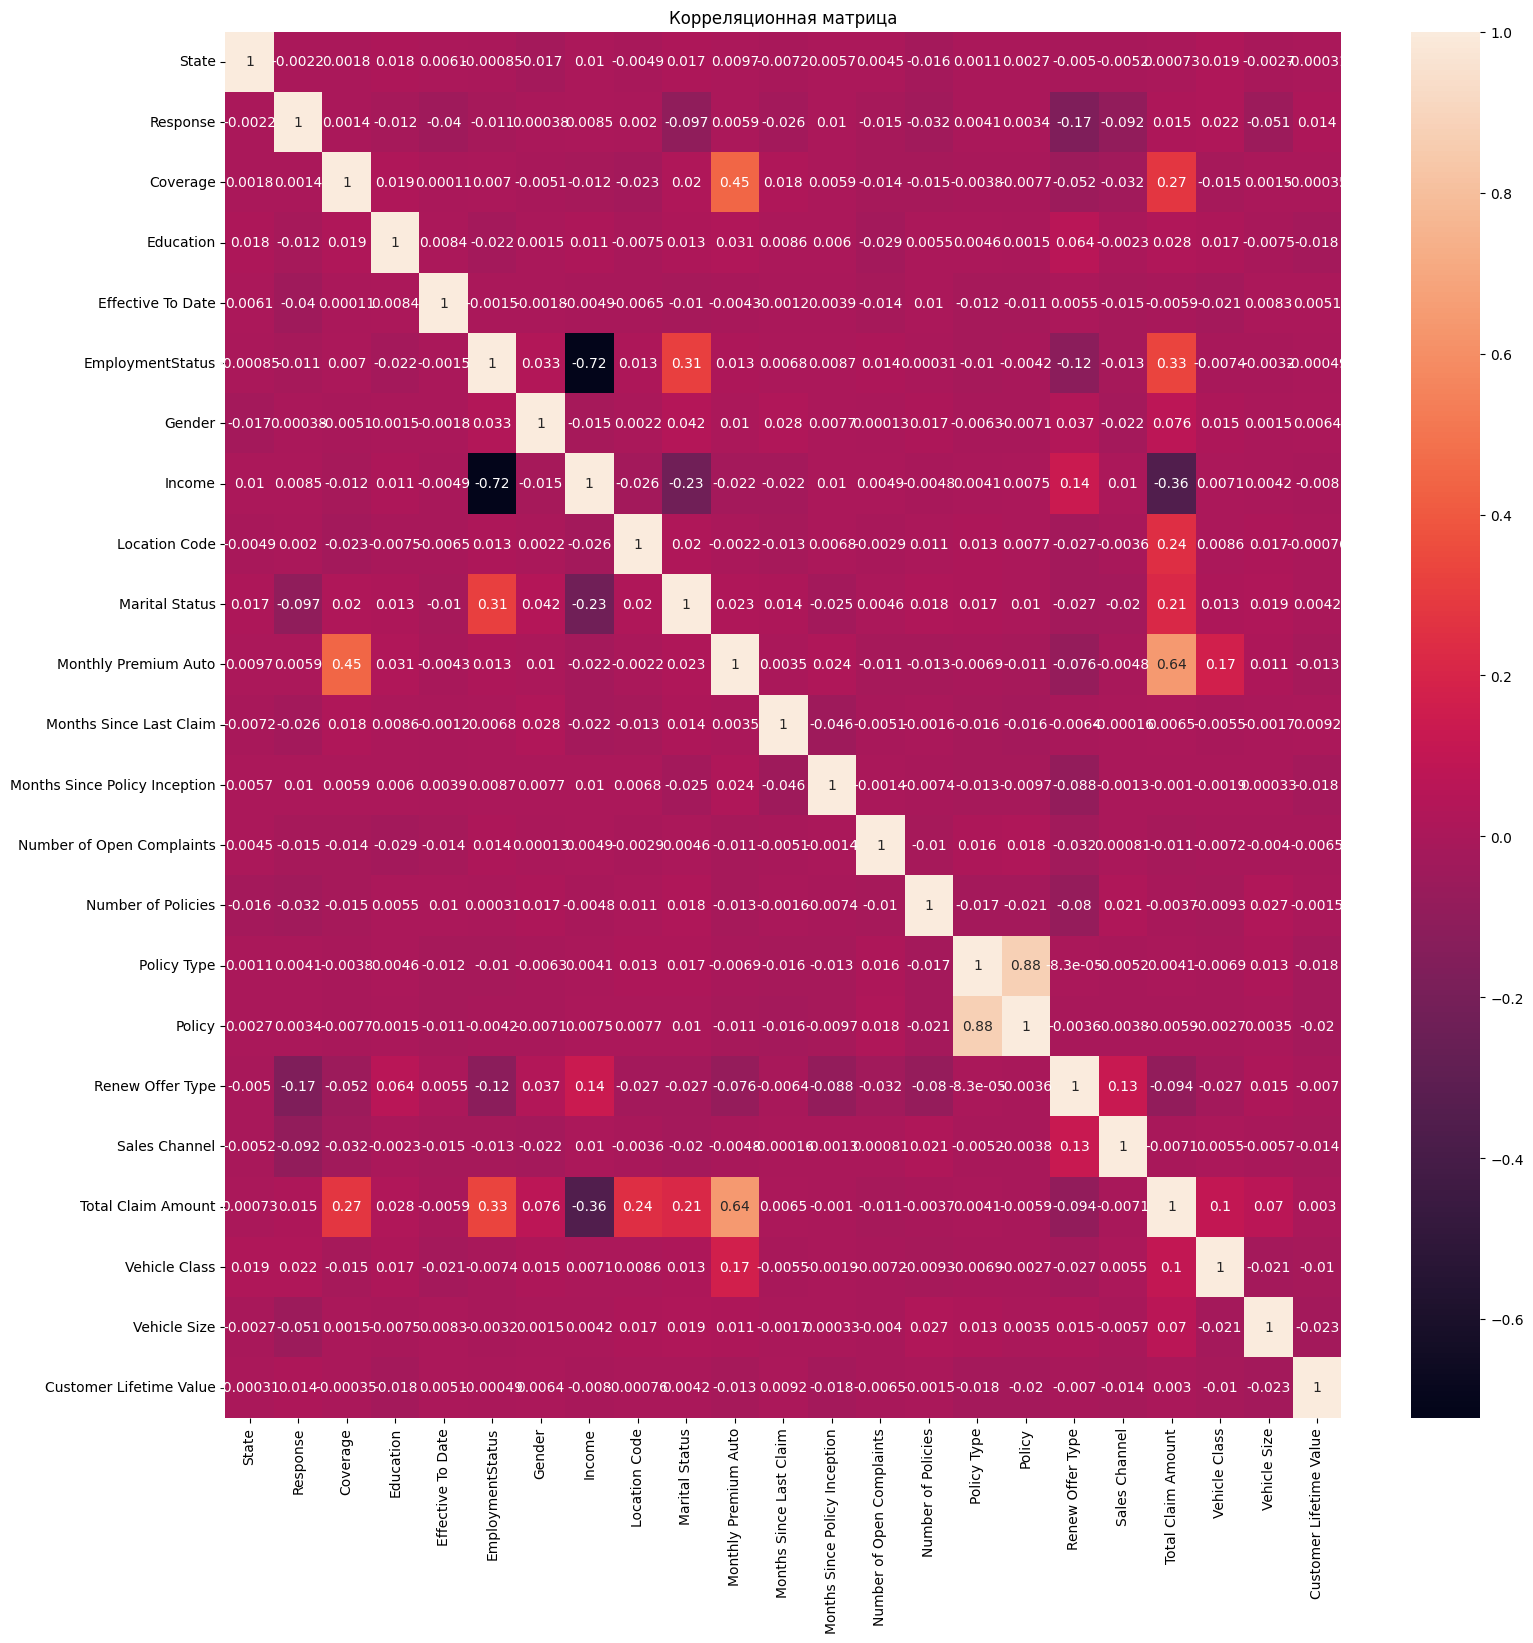

In [28]:
# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

- Нет признаков, сильно коррелирующих с целевой переменной LTV.
- Наибольшая корреляция выявлена между признаками:  
  _Monthly Premium Auto_ - _Total Claim Amount_

## 4) Обучение различных моделей и подбор гиперпараметров

Будем сравнивать между собой 3 модели:
- Логистическую регрессию,
- классификатор на решающем дереве,
- случайный лес

### Линейная регрессия

In [29]:
# Линейная регрессия
from sklearn.linear_model import SGDRegressor

# Кросс-валидация для Линейной регрессии
from sklearn.model_selection import cross_validate, cross_val_score

# Метрика Линейной регрессии
from sklearn.metrics import mean_squared_error

In [30]:
import sklearn.metrics

In [31]:
lin_reg = SGDRegressor()
lin_reg.fit(X, y1)

SGDRegressor()

In [32]:
# Сохранение 5-ти метрик в переменной cv_lin_reg
cv_lin_reg = cross_val_score(lin_reg,
                      X_sc,
                      y1,
                      cv = 5)

In [33]:
# Получение среднего значения для оценки качества модели
print("Результаты Линейной регрессии:", cv_lin_reg.mean())

Результаты Линейной регрессии: 0.24053722806822533


In [34]:
# Оценка предсказаний на обучающей выборке
# Результат: полученное значение средней квадратичной ошибки RMSE
lin_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y1, lin_predictions)
print("RMSE: {}".format(np.sqrt(lin_mse)))

RMSE: 4.447321596488006e+17


In [35]:
# Оценка предсказаний на тестовой выборке
# Результат: полученное значение средней квадратичной ошибки RMSE
lin_test_predictions = lin_reg.predict(X_test)
lin_test_mse = mean_squared_error(y1_test, lin_test_predictions)
print("RMSE: {}".format(np.sqrt(lin_test_mse)))

RMSE: 4.551030756745388e+17


### Решающее дерево

In [36]:
# Решающее дерево
from sklearn.tree import DecisionTreeRegressor

In [37]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X, y1)

DecisionTreeRegressor()

In [45]:
# Сохранение 5-ти метрик в переменной cv_lin_reg
cv_dec_tree = cross_val_score(dec_tree,
                      X_sc,
                      y1,
                      cv = 5)

In [39]:
# Получение среднего значения для оценки качества модели
print("Результаты Дерева решений:", cv_dec_tree.mean())

Результаты Дерева решений: 0.8195719427571866


In [40]:
# Оценка предсказаний на обучающей выборке
# Результат: полученное значение средней квадратичной ошибки RMSE
tree_predictions = dec_tree.predict(X)
tree_mse = mean_squared_error(y1, tree_predictions)
print("RMSE: {}".format(np.sqrt(tree_mse)))

RMSE: 1.7479293745358295e-16


In [41]:
# Оценка предсказаний на тестовой выборке
# Результат: полученное значение средней квадратичной ошибки RMSE
tree_test_predictions = dec_tree.predict(X_test)
tree_test_mse = mean_squared_error(y1_test, tree_test_predictions)
print("RMSE: {}".format(np.sqrt(tree_test_mse)))

RMSE: 0.2673522207540708


### Случайный лес

In [42]:
# Случайный лес
from sklearn.ensemble import RandomForestRegressor

In [43]:
ran_for = DecisionTreeRegressor()
ran_for.fit(X, y1)

DecisionTreeRegressor()

In [46]:
# Сохранение 5-ти метрик в переменной cv_lin_reg
cv_ran_for = cross_val_score(ran_for,
                      X_sc,
                      y1,
                      cv = 5)

In [47]:
# Получение среднего значения для оценки качества модели
print("Результаты Дерева решений:", cv_ran_for.mean())

Результаты Дерева решений: 0.8176718953420758


In [49]:
# Оценка предсказаний на обучающей выборке
# Результат: полученное значение средней квадратичной ошибки RMSE
ranfor_predictions = ran_for.predict(X)
ranfor_mse = mean_squared_error(y1, ranfor_predictions)
print("RMSE: {}".format(np.sqrt(ranfor_mse)))

RMSE: 1.5550869336291779e-16


In [53]:
# Оценка предсказаний на тестовой выборке
# Результат: полученное значение средней квадратичной ошибки RMSE
ranfor_test_predictions = ran_for.predict(X_test)
ranfor_test_mse = mean_squared_error(y1_test, ranfor_test_predictions)
print("RMSE: {}".format(np.sqrt(ranfor_test_mse)))

RMSE: 0.26760988940927155


Дерево решений и случайный лес показали значительно более высокие результаты, чем Линейная регрессия.  
При этом Случайный лес показал лучше предсказания для обучающей выборки.  
Т.е. в целом можно считать модель Случайного леса выиграла.

## Интерпретация модели и важность признаков

Для того чтобы понять что заставляет пользователей уходить и оставаться, нужно понять влияние признаков. При работе с логистической регрессией можно использовать атрибут `coef_`

**Важно** атрибут `coef_` работает только когда метод `fit()` был явно вызван

In [65]:
# Обязателен явный вызов метода fit
# lin_reg.fit(X, y)

print("Коэффициенты в линейной регрессии:", lin_reg.coef_)

Коэффициенты в линейной регрессии: [ 2.07818064e+11 -7.04348229e+10  1.44466856e+11 -1.65911699e+11
  3.33863032e+11 -3.29637174e+11 -1.13522595e+11  9.23499184e+12
 -2.68175871e+11 -2.14794933e+11  2.58379607e+11  4.81402435e+10
 -2.77459344e+11  3.16213761e+11 -6.96241124e+11 -1.06642277e+11
 -3.12313579e+11 -3.20241620e+11 -3.95173335e+11 -1.45392673e+10
  6.02629716e+11 -3.51669907e+11]


При работе с одним решающем дереве интерпретировать результаты достаточно просто, для этого есть атрибут `feature_importances_` Он показывает долю важности признака на целевую переменную

**Важно** атрибут `feature_importances_` работает только когда метод `fit()` был явно вызван

In [66]:
# Обязателен явный вызов метода fit
# dec_tree.fit(X, y)

print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Важность признаков решающего дерева [2.88960555e-03 4.64883379e-03 9.22634646e-04 3.96562429e-03
 1.01596509e-02 4.74973288e-03 2.26911778e-03 9.01326350e-03
 6.54395995e-04 3.40395633e-03 2.30361713e-01 9.21871513e-03
 1.29869787e-02 2.92487863e-03 6.73605173e-01 5.59518553e-04
 3.96045459e-03 3.22879644e-03 2.15879932e-03 1.44743620e-02
 1.41508259e-03 2.42871195e-03]


Некоторые типы моделей (например экстримально случайный лес и все что основано на бустинге) интерпретировать стандартными способами практически невозможно.

Для интерпретации таких моделей можно использовать библиотеку `shap`, которая работает на основе ядра и вектора Шэпли - важнейших понятий в коалиционной теории игр

In [67]:
# Раскомментируйте чтобы установить
# !pip install shap

In [68]:
import shap

In [69]:
# Загружаем JS шаблоны для визуализации
shap.initjs()

# Обязателен явный вызов метода fit
# ran_for.fit(X, y)

print("Обучили модель, переходим к визуализации")

# Интерпретируем предсказания модели при помощи SHAP
explainer = shap.TreeExplainer(ran_for)
shap_values = explainer.shap_values(X)

Обучили модель, переходим к визуализации


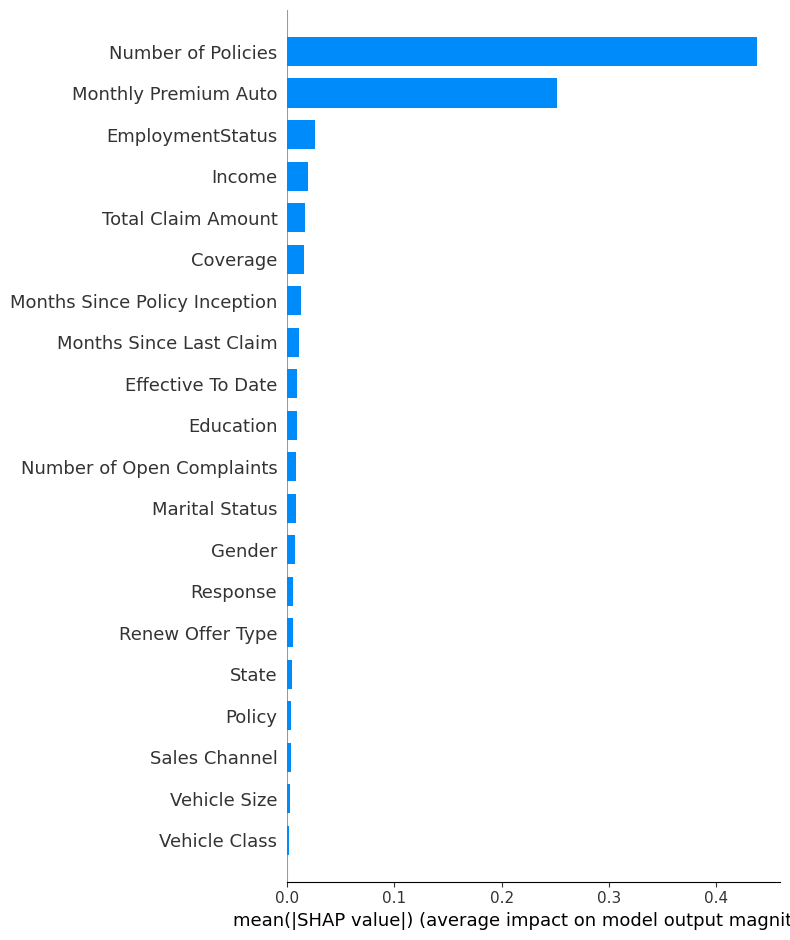

In [70]:
# Общий график
shap.summary_plot(shap_values, X, plot_type="bar")

Наиболее важными признаками, влияющими на результаты LTV, являются:
- _Number of Policies_ - количество полисов
- _Monthly Premium Auto_